# TOTAL DATASET

In [6]:
from Bio import AlignIO
import numpy as np
import matplotlib.pyplot as plt
import pysam
from collections import defaultdict

tot_lengths=[]
tot_mapping_lengths=[]

c=0
with pysam.AlignmentFile(f"/home/jack/code/recombinant_population_analysis/results/alignments/P2_7.bam", "rb") as bam:
    for read in bam.fetch():
        if not(read.is_secondary):
            c+=1
            tot_lengths.append(read.infer_read_length())
            '''
            infer read length from CIGAR alignment.
            This method deduces the read length from the CIGAR alignment including hard-clipped bases.
            Returns None if CIGAR alignment is not present. 
            '''
            tot_mapping_lengths.append(read.query_alignment_length)
            '''
            
            '''


In [7]:
tot_alignments=c
print("tot_alignments:",tot_alignments)

tot_mean_length=np.mean(tot_lengths)
print("tot_mean_length:",tot_mean_length)

tot_bases=np.sum(tot_lengths)
print("tot_bases:",tot_bases)

tot_mapped_bases=np.sum(tot_mapping_lengths)
print("tot_mapped_bases:",tot_mapped_bases)

tot_alignments: 249382
tot_mean_length: 4456.71690418715
tot_bases: 1111424975
tot_mapped_bases: 1038216984


(0.0, 10000.0)

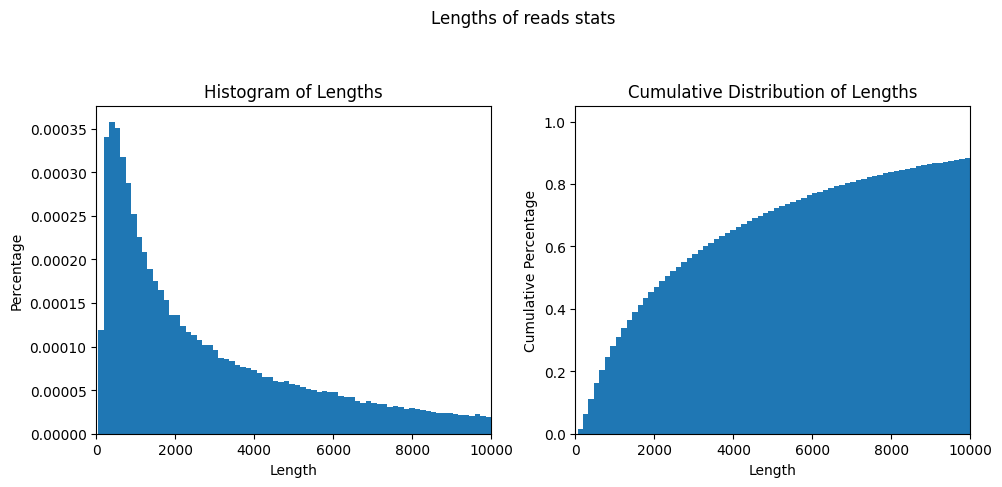

In [8]:
length, (density, cumulative) = plt.subplots(1, 2, figsize=(10, 5))

length.suptitle("Lengths of reads stats")
length.tight_layout(pad=3.0)

density.hist(tot_lengths, bins=1000, density=True)
density.set_xlabel('Length')
density.set_ylabel('Percentage')
density.set_title('Histogram of Lengths')
density.set_xlim(0, 10000)

cumulative.hist(tot_lengths, bins=1000, density=True, cumulative=True)
cumulative.set_xlabel('Length')
cumulative.set_ylabel('Cumulative Percentage')
cumulative.set_title('Cumulative Distribution of Lengths')
cumulative.set_xlim(0, 10000)



(0.0, 10000.0)

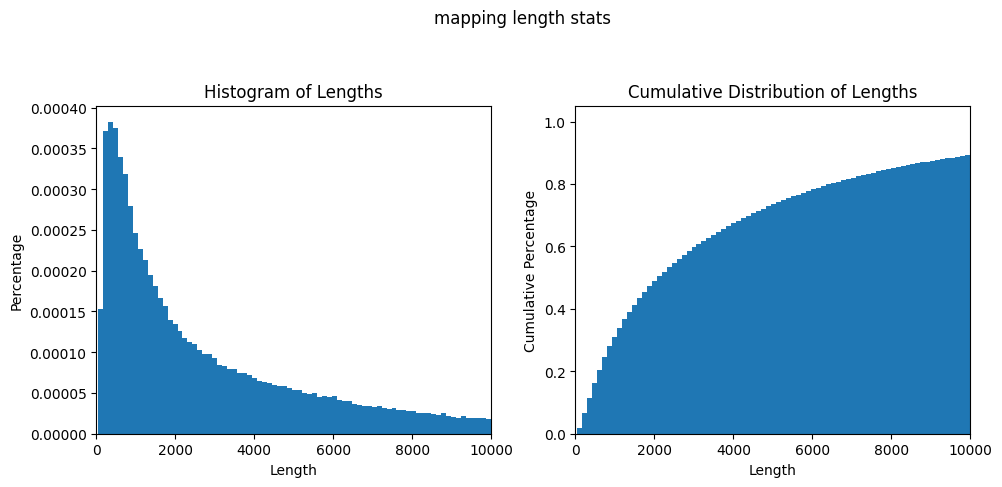

In [9]:
mapping_length, (density, cumulative) = plt.subplots(1, 2, figsize=(10, 5))

mapping_length.suptitle("mapping length stats")
mapping_length.tight_layout(pad=3.0)

density.hist(tot_mapping_lengths, bins=1000, density=True)
density.set_xlabel('Length')
density.set_ylabel('Percentage')
density.set_title('Histogram of Lengths')
density.set_xlim(0, 10000)

cumulative.hist(tot_mapping_lengths, bins=1000, density=True, cumulative=True)
cumulative.set_xlabel('Length')
cumulative.set_ylabel('Cumulative Percentage')
cumulative.set_title('Cumulative Distribution of Lengths')
cumulative.set_xlim(0, 10000)

(0.0, 40000.0)

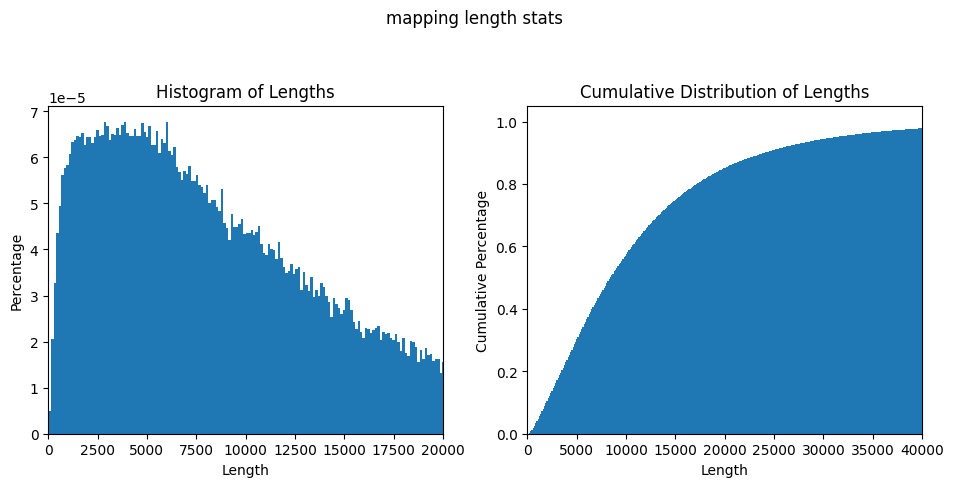

In [10]:
mapping_length, (density, cumulative) = plt.subplots(1, 2, figsize=(10, 5))

mapping_length.suptitle("mapping length stats")
mapping_length.tight_layout(pad=3.0)

density.hist(tot_mapping_lengths, bins=1000, density=True, weights=tot_mapping_lengths)
density.set_xlabel('Length')
density.set_ylabel('Percentage')
density.set_title('Histogram of Lengths')
density.set_xlim(0, 20000)

cumulative.hist(tot_mapping_lengths, bins=1000, density=True, cumulative=True, weights=tot_mapping_lengths)
cumulative.set_xlabel('Length')
cumulative.set_ylabel('Cumulative Percentage')
cumulative.set_title('Cumulative Distribution of Lengths')
cumulative.set_xlim(0, 40000)

# TOTAL DATASET WITH LENGTH THRESHOLD

In [11]:
thr_lengths=[]
threshold=5000

thr_c=0
with pysam.AlignmentFile(f"/home/jack/code/recombinant_population_analysis/results/alignments/P2_7.bam", "rb") as bam:
    for read in bam.fetch():
        if not(read.is_secondary):
            if read.query_alignment_length>threshold:
                thr_lengths.append(read.query_alignment_length)
                thr_c+=1

print(thr_c)

67274


In [12]:
thr_alignments=thr_c
print("thr_alignments:",thr_alignments)

thr_mean_length=np.mean(thr_lengths)
print("thr_mean_length:",thr_mean_length)

thr_bases=np.sum(thr_lengths)
print("thr_bases:",thr_bases)

thr_alignments: 67274
thr_mean_length: 10842.788045901834
thr_bases: 729437723


In [13]:
print("fraction of reads",thr_alignments/tot_alignments)

print("fraction of bases",thr_bases/tot_bases)

fraction of reads 0.26976285377453063
fraction of bases 0.6563085582992231


# TEST DATASET

In [15]:
test_mafft_mapping_lengths=[]

mafft_c=0
mafft_tot_c=0
with pysam.AlignmentFile(f"/home/jack/code/recombinant_population_analysis/data/test/test_P2_7.bam", "rb") as bam:
    for read in bam.fetch():
        if not(read.is_secondary):
            mafft_c+=1
            test_mafft_mapping_lengths.append(read.query_alignment_length)
        mafft_tot_c+=1

print("mafft_tot_c:",mafft_tot_c)

test_mafft_alignments=mafft_c
print("test_alignments:",test_mafft_alignments)

test_mafft_mean_length=np.mean(test_mafft_mapping_lengths)
print("test_mean_length:",test_mafft_mean_length)

test_mafft_bases=np.sum(test_mafft_mapping_lengths)
print("test_bases:",test_mafft_bases)

mafft_tot_c: 310
test_alignments: 218
test_mean_length: 31689.95871559633
test_bases: 6908411


In [18]:
test_hybrid_mapping_lengths=[]
test_hybrid_actual_lengths=[]

hybrid_c=0
hybrid_tot_c=0
with pysam.AlignmentFile(f"/home/jack/code/recombinant_population_analysis/data/test/hybrid_test_P2_7.bam", "rb") as bam:
    for read in bam.fetch():
        if not(read.is_secondary):
            hybrid_c+=1
            test_hybrid_mapping_lengths.append(read.query_alignment_length)

            read_seq = read.query_sequence
            read_msa_seq = ''

            alignment_array = read.get_aligned_pairs()

            for (read_pos,ref_pos) in alignment_array:
                if ref_pos!=None:
                    if read_pos==None:
                        read_msa_seq+='-'
                    else:
                        read_msa_seq+=read_seq[read_pos].lower()
            
            test_hybrid_actual_lengths.append(len(read_msa_seq))

        hybrid_tot_c+=1

print("hybrid_tot_c:",hybrid_tot_c)

test_hybrid_alignments=hybrid_c
print("test_alignments:",test_hybrid_alignments)

test_hybrid_mean_length=np.mean(test_hybrid_mapping_lengths)
print("test_mean_length:",test_hybrid_mean_length)

test_hybrid_bases=np.sum(test_hybrid_mapping_lengths)
print("test_bases:",test_hybrid_bases)

test_hybrid_actual_bases=np.sum(test_hybrid_actual_lengths)
print("test_actual_bases:",test_hybrid_actual_bases)

hybrid_tot_c: 223
test_alignments: 222
test_mean_length: 31047.88738738739
test_bases: 6892631
test_actual_bases: 7578496
